# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

![image.png](attachment:image.png)

1- Load data

In [22]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [23]:
df = pd.read_csv('loan_prediction.csv')
df.shape

(614, 13)

In [24]:
assert df.shape == (614, 13)

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [26]:
df.drop("Loan_ID",1, inplace=True)
df["Loan_Status"] = df["Loan_Status"].astype(str).astype("category").cat.codes

In [27]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [28]:
stats = pd.DataFrame(columns=["type","# null","# unique","unique values"])

stats["type"] = df.dtypes
stats["# null"] = df.isnull().sum()
stats["# unique"] = df.nunique()

for col in df:
    uniqueVal = df[col].unique()
    uniqueVal = "-".join(str(x) for x in uniqueVal)
    stats["unique values"][col] = uniqueVal
    
stats

,type,# null,# unique,unique values
Gender,object,13,2,Male-Female-nan
Married,object,3,2,No-Yes-nan
Dependents,object,15,4,0-1-2-3+-nan
Education,object,0,2,Graduate-Not Graduate
Self_Employed,object,32,2,No-Yes-nan
ApplicantIncome,int64,0,505,5849-4583-3000-2583-6000-5417-2333-3036-4006-1...
CoapplicantIncome,float64,0,287,0.0-1508.0-2358.0-4196.0-1516.0-2504.0-1526.0-...
LoanAmount,float64,22,203,nan-128.0-66.0-120.0-141.0-267.0-95.0-158.0-16...
Loan_Amount_Term,float64,14,10,360.0-120.0-240.0-nan-180.0-60.0-300.0-480.0-3...
Credit_History,float64,50,2,1.0-0.0-nan


4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [29]:
df = df.fillna(value= {"Married": "Yes"})
df.dropna(inplace=True)
print(df.shape)

(480, 12)


In [30]:
assert df.isnull().sum().sum() == 0

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

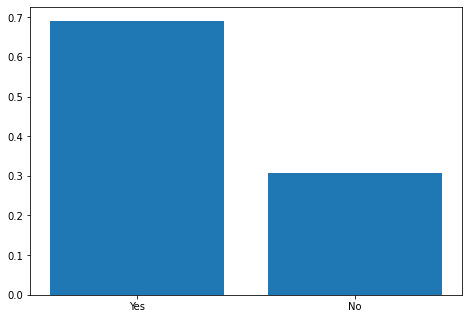

In [31]:
ax = plt.figure().add_axes([0,0,1,1])
ax.bar(['Yes', 'No'],df.Loan_Status.value_counts(normalize=True))
plt.show()

5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [32]:
approuved = (df['Loan_Status'] == 1).sum()
print("Number of approved loans :")
print(approuved)

nonApproved = (df['Loan_Status'] ==0).sum()
print("Number of non approved loans :")
print(nonApproved)

Number of approved loans :
332
Number of non approved loans :
148


In [33]:
accuracy = approuved/(approuved + nonApproved)
print(accuracy)

0.6916666666666667


6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [34]:
def make_bar_plot(df, column):
    ploter = pd.DataFrame()
    ploter['total']=df.groupby(column).size()
    ploter['Given_Loan'] = df.groupby(column).sum()['Loan_Status']
    ploter['percentage'] = round(ploter['Given_Loan']/ploter['total']*100,2)
    print(ploter)
    ploter['Given_Loan'].plot(kind="bar")
    ploter['total'].plot(kind="bar",alpha=0.5,title="Loans per "+str(column))
    plt.show()

               total  Given_Loan  percentage
Property_Area                               
Rural            139        85.0       61.15
Semiurban        191       149.0       78.01
Urban            150        98.0       65.33


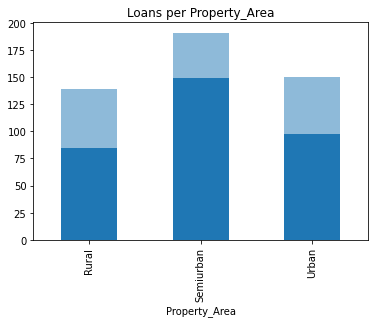

In [35]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [36]:
def make_box_plot(df, col):
    df.boxplot(by='Loan_Status',column=col,grid=False)

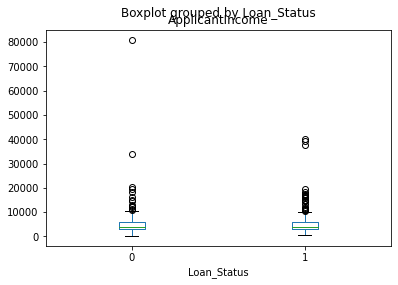

In [37]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

****************** 0 *******************
        total  Given_Loan  percentage
Gender                               
Female     86        54.0       62.79
Male      394       278.0       70.56


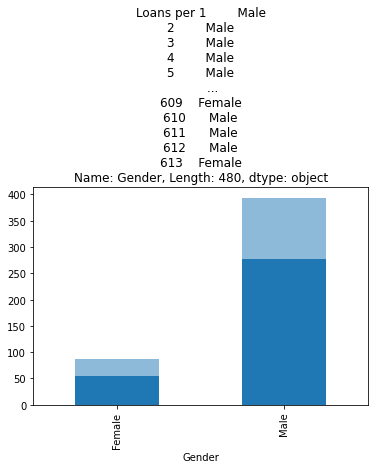

****************** 1 *******************
         total  Given_Loan  percentage
Married                               
No         169       105.0       62.13
Yes        311       227.0       72.99


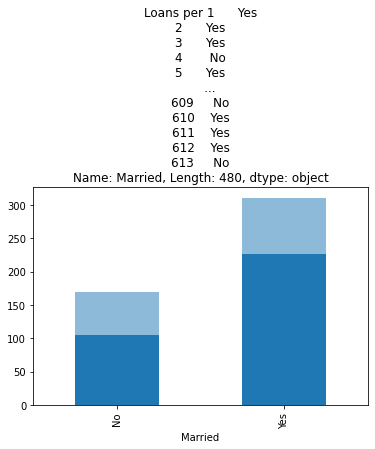

****************** 2 *******************
            total  Given_Loan  percentage
Dependents                               
0             274       187.0       68.25
1              80        52.0       65.00
2              85        65.0       76.47
3+             41        28.0       68.29


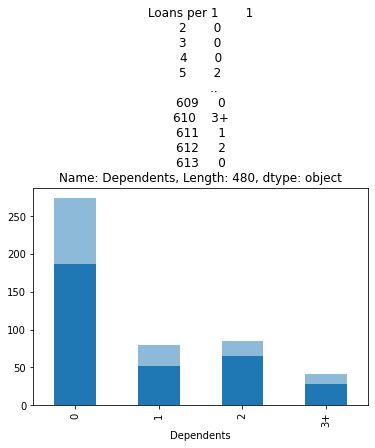

****************** 3 *******************
              total  Given_Loan  percentage
Education                                  
Graduate        383       271.0       70.76
Not Graduate     97        61.0       62.89


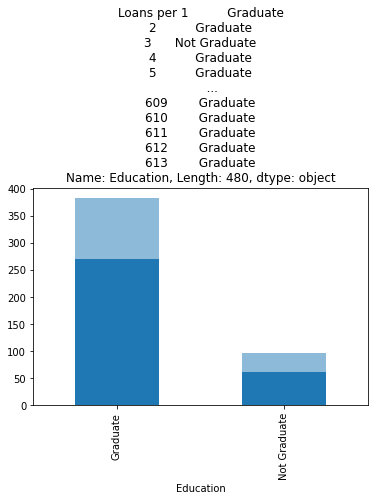

****************** 4 *******************
               total  Given_Loan  percentage
Self_Employed                               
No               414       289.0       69.81
Yes               66        43.0       65.15


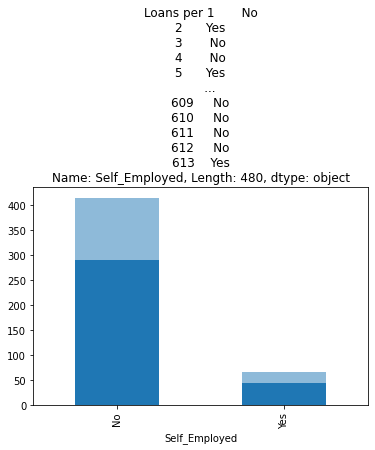

****************** 5 *******************


KeyError: 'Columns not found: 3073, 1025, 3075, 4106, 3083, 2060, 3086, 3089, 2071, 3095, 4124, 3100, 19484, 3103, 7200, 2083, 4133, 5166, 5167, 2045, 3125, 33846, 39999, 4160, 5185, 4166, 4167, 6216, 3153, 2130, 3155, 2132, 4180, 3158, 3159, 2137, 2138, 4188, 17500, 3166, 4191, 3167, 2149, 3173, 4200, 81000, 6250, 9323, 8300, 3180, 9328, 2165, 2167, 4095, 3200, 4226, 2178, 5250, 6277, 4230, 3208, 6283, 8333, 8334, 16525, 2192, 5266, 150, 11417, 3229, 3232, 2213, 3237, 5285, 10408, 3244, 2221, 3246, 10416, 3250, 6325, 3254, 4281, 4283, 2237, 2239, 4288, 5316, 3273, 4300, 2253, 4301, 3283, 12500, 2281, 39147, 11500, 4333, 6383, 3315, 3316, 4342, 14583, 4344, 2297, 2301, 4350, 3326, 6400, 4354, 2309, 6406, 3333, 3340, 5391, 10513, 6417, 7441, 19730, 1299, 2330, 16667, 16666, 2333, 3357, 3358, 4384, 9504, 9508, 3366, 5417, 2346, 4400, 4408, 2366, 9538, 3399, 3400, 2378, 3406, 2383, 9560, 3417, 3418, 14683, 5468, 2400, 1378, 3427, 6500, 3430, 5488, 8566, 2423, 2425, 3450, 5500, 2435, 3459, 2439, 3466, 6540, 5516, 15759, 2454, 3481, 5532, 7583, 1442, 3497, 3500, 2479, 8624, 2483, 2484, 3510, 2491, 5568, 3522, 2499, 2500, 4547, 4554, 2507, 2510, 6608, 4566, 8666, 3547, 1500, 2526, 4583, 9703, 7660, 11757, 4600, 4606, 10750, 4608, 1538, 3588, 4616, 3593, 3597, 3598, 3600, 2577, 14866, 5649, 2583, 14880, 3617, 3620, 2600, 12841, 3625, 4652, 6700, 8750, 5677, 2609, 4666, 2620, 7740, 5695, 1600, 2625, 5703, 4683, 5708, 3660, 10833, 4691, 4692, 2645, 3667, 2647, 1625, 3675, 3676, 2653, 5726, 8799, 4707, 4708, 2661, 2666, 7787, 3691, 4723, 2679, 3704, 3708, 6783, 1668, 645, 3717, 2698, 4750, 3727, 2708, 5780, 14999, 15000, 2717, 2718, 3748, 6822, 2726, 3750, 5800, 3762, 5815, 5818, 5819, 5821, 2750, 3775, 2755, 5829, 2768, 4817, 3800, 6875, 7901, 1759, 12000, 2785, 2787, 3812, 3814, 4843, 9963, 2799, 18165, 1782, 11000, 16120, 3833, 4860, 7933, 4865, 3846, 1800, 20233, 3850, 7948, 10000, 2833, 1809, 3858, 1811, 4885, 3859, 4887, 3867, 1820, 4895, 3875, 5923, 6950, 1836, 5935, 3887, 4917, 5941, 4923, 2876, 3900, 1853, 3902, 8000, 2882, 5955, 1863, 2889, 3917, 2895, 1875, 2900, 4950, 37719, 3927, 2917, 3941, 2920, 3948, 2927, 17263, 6000, 2935, 16250, 9083, 2947, 1926, 3975, 5000, 1928, 11146, 8072, 2957, 2958, 8080, 6033, 3987, 3988, 2965, 3993, 2971, 10139, 6045, 18333, 4000, 6050, 4006, 1958, 4009, 1963, 7085, 6065, 5042, 2995, 3000, 1977, 7100, 3015, 1993, 9166, 9167, 13262, 6096, 3029, 4053, 3033, 3036, 2014, 7142, 1000, 3052, 6125, 2031, 6133, 3062, 3069, 7167'

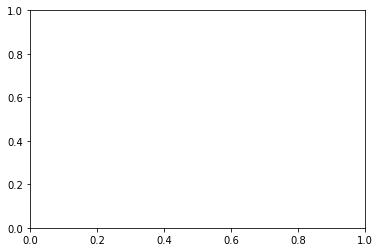

In [39]:
from pandas.api.types import is_numeric_dtype

for col in range (len(df.columns)-1):
  print(f'****************** {col} *******************')
  if (is_numeric_dtype(df.iloc[:, col]) == True): 
    make_box_plot(df, df.iloc[:, col])
  else:
    make_bar_plot(df, df.iloc[:, col])

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [ ]:
df = pd.get_dummies(df,columns=["Property_Area","Dependents"])

print the head of df

In [ ]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [ ]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [ ]:
for col in df:
    if df[col].dtype == "object":
        df[col] = pd.Categorical(df[col]).codes

Print the head of df

In [ ]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,1,0,0,0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,1,0,0,0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,1,0,0,0
5,1,1,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,1,0


In [ ]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [ ]:
y = df["Loan_Status"]
X = df.drop("Loan_Status",axis=1)
print (X.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

print ("train shape",X_train.shape)
print ("test shape", X_test.shape)

train shape (336, 16)
test shape (144, 16)


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=1)
reg.fit(X_train, y_train)

#here we can print the score (not asked)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print ('train accuracy =',train_score)
print ('test accuracy =',test_score)

train accuracy = 0.7976190476190477
test accuracy = 0.7986111111111112


9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

Y_pred = reg.predict(X_test)
conf_mat = confusion_matrix(y_test,Y_pred)

print(conf_mat)

[[22 25]
 [ 4 93]]


In [ ]:
print ('precision_0 =',precision_score(y_test, Y_pred))
print ('recall_1 =',recall_score(y_test, Y_pred))

precision_0 = 0.788135593220339
recall_1 = 0.9587628865979382


10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg,X,y,scoring='f1',cv=5)
print (scores)
print ('scores mean =', scores.mean(), 'scores std =', scores.std())

[0.87248322 0.8590604  0.8590604  0.91549296 0.86111111]
scores mean = 0.8734416191406457 scores std = 0.02160978392490238


how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.